In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the data

In order for us to understand our data we need to ask the following questions:

1. How many rows and columns are in our dataset?
2. What are the datatypes in our dataset?
3. Are there any missing values in our dataset?

In [2]:
# Import the titanic/train.csv file.
# We will be using this as our data file
data = pd.read_csv('../../data/Level 1/titanic/train.csv')
data.shape

(891, 12)

In [3]:
data.info() # This gives us column names, data types, and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head() # Return the top n rows (default is 5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe() # Show the statistical summary of the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Handling missing values

Now that we know that our data has missing values, let's work on handling them.
There are 2 key questions to ask here

1. How data is missing?
2. Should I fill in missing values or remove them?

In [6]:
# Get the number of all the missing values
total_missing_values = data.isnull().values.sum()
total_missing_values

np.int64(866)

In [7]:
total_cells = np.prod(data.shape)
percent_missing = total_missing_values / total_cells * 100
print(f'{percent_missing:.2f}% of the data is missing')

8.10% of the data is missing


In [8]:
# fill in the missing values
for col in data.columns:
    if data.isnull().sum()[col] != 0:
        print(f'{col} -> {data.isnull().sum()[col]}')

Age -> 177
Cabin -> 687
Embarked -> 2


In [9]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data.drop(columns=['Cabin'], inplace=True)

In [10]:
data.isnull().values.sum()

np.int64(0)

# Visualizing the data

Data visualization helps us develop a deeper understand of the data we are working with. 
It helps us come up with conclusions regarding relationships, and distributions.

The key questions to ask when it comes to data visualization are:

1. What do the distributions of numerical features look like?
2. Are there any outliers?

In [11]:
print([col for col in data.columns if data[col].dtype == 'int64' or data[col].dtype == 'float64'])

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [12]:
num_cols = data.select_dtypes(exclude=['object', 'category']).columns
list(num_cols)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

<Axes: xlabel='Age', ylabel='Count'>

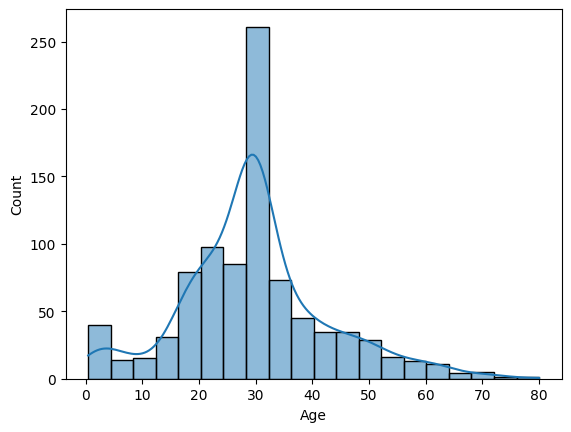

In [13]:
sns.histplot(data['Age'], bins=20, kde=True)

<Axes: xlabel='Survived', ylabel='Fare'>

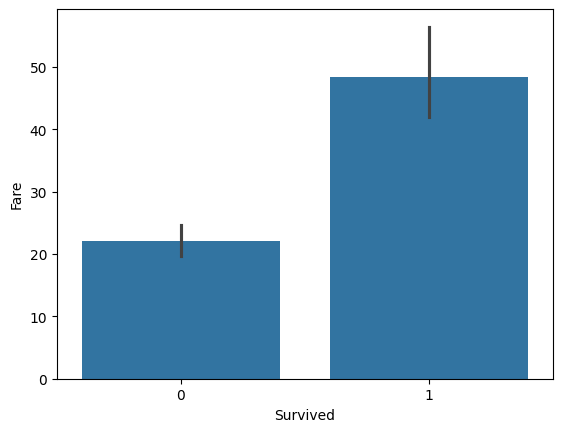

In [14]:
sns.barplot(y='Fare', x='Survived', data=data)

<Axes: xlabel='Survived', ylabel='count'>

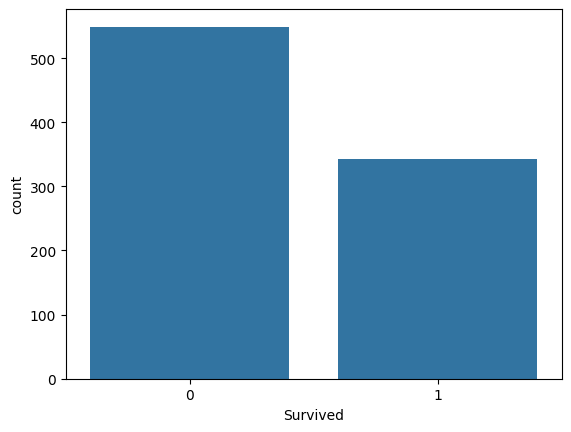

In [15]:
sns.countplot(x='Survived', data=data)

<Axes: xlabel='Age'>

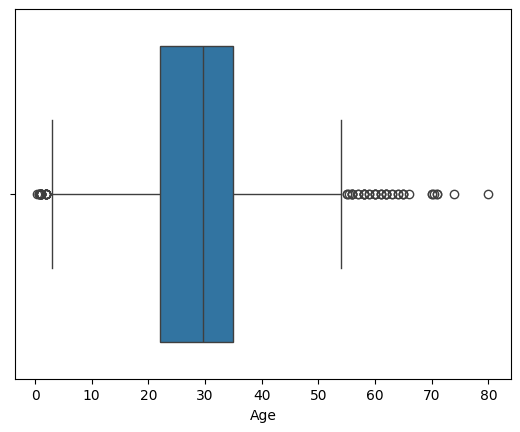

In [16]:
sns.boxplot(x='Age', data=data)

<Axes: >

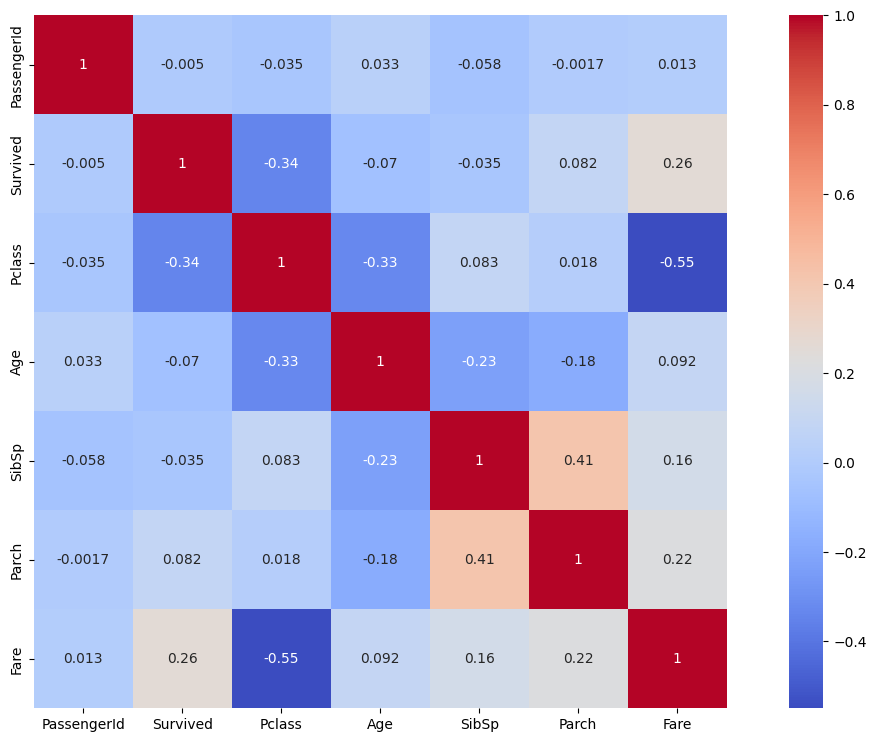

In [17]:
plt.figure(figsize=(16, 9))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', square=True)

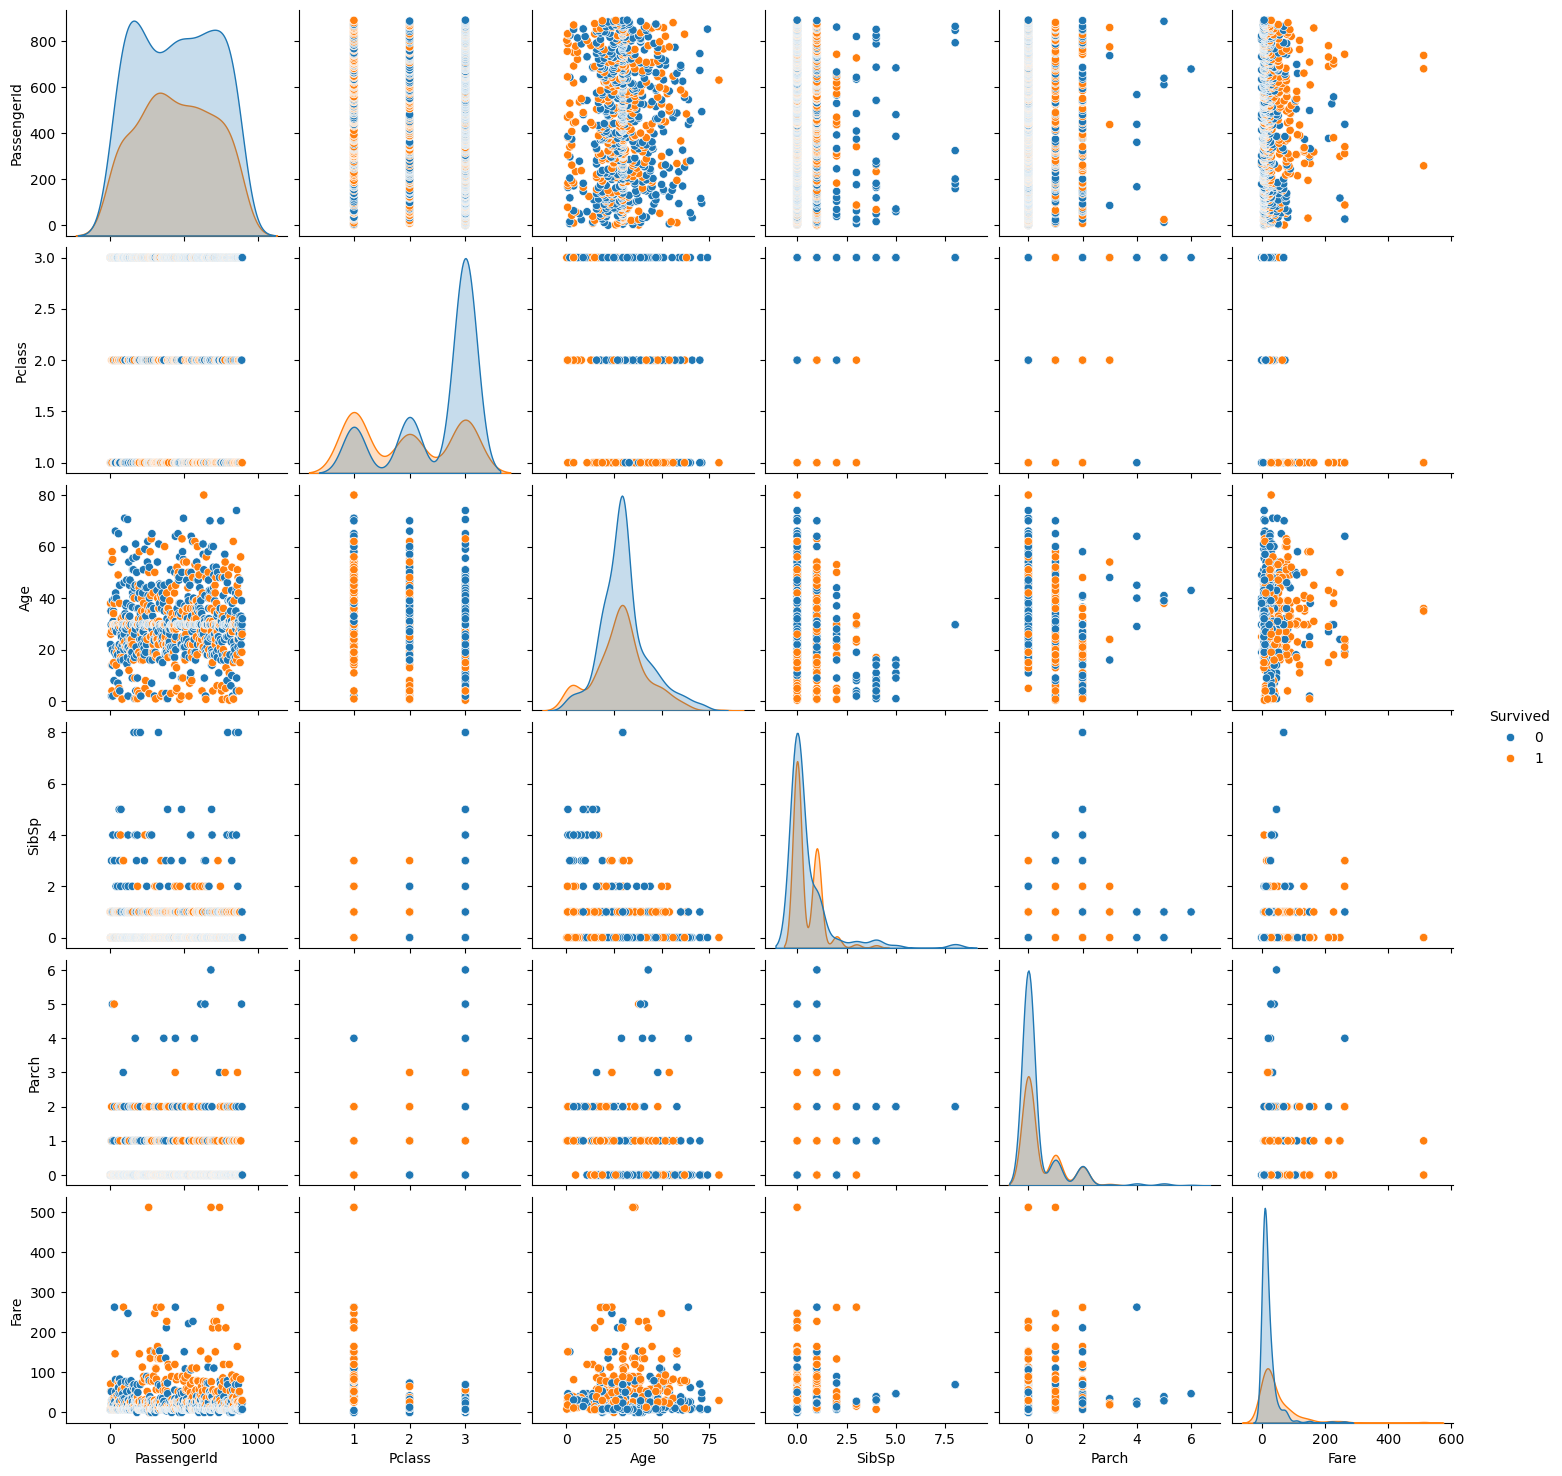

In [18]:
sns.pairplot(data, hue='Survived')

<Axes: xlabel='Survived', ylabel='Pclass'>

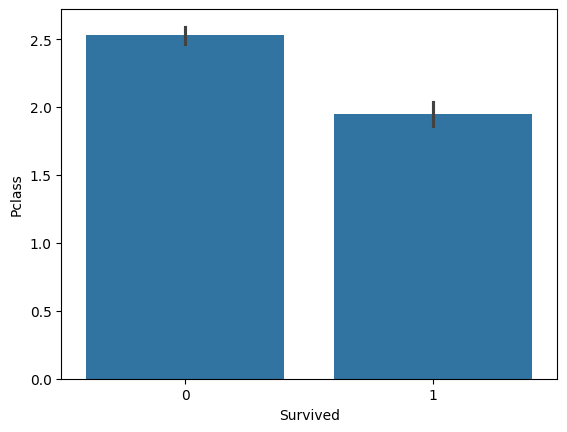

In [19]:
sns.barplot(x='Survived', y='Pclass', data=data)

<Axes: xlabel='Survived', ylabel='Age'>

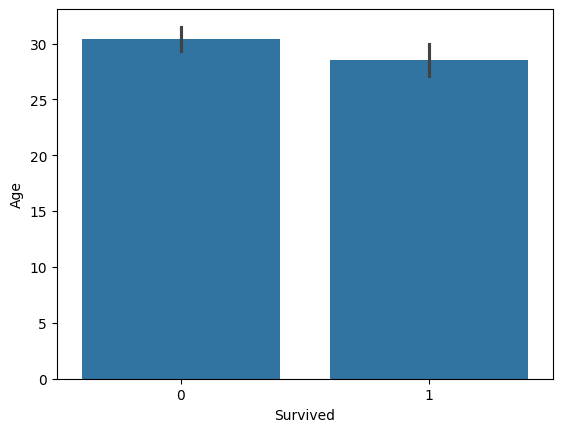

In [20]:
sns.barplot(x='Survived', y='Age', data=data)

In [21]:
data['Pclass'].nunique()

3

<Axes: xlabel='Sex', ylabel='Survived'>

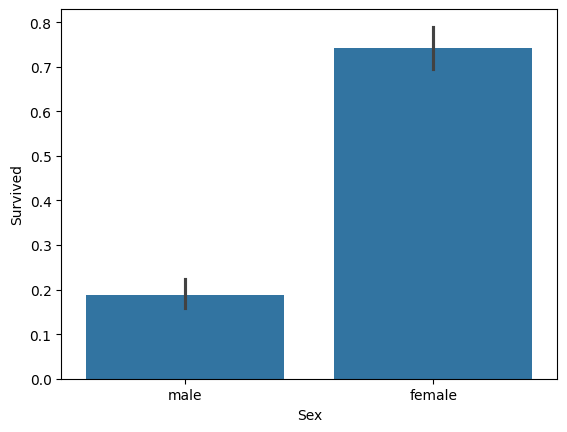

In [22]:
sns.barplot(y='Survived', x='Sex', data=data)

<Axes: xlabel='Fare', ylabel='Density'>

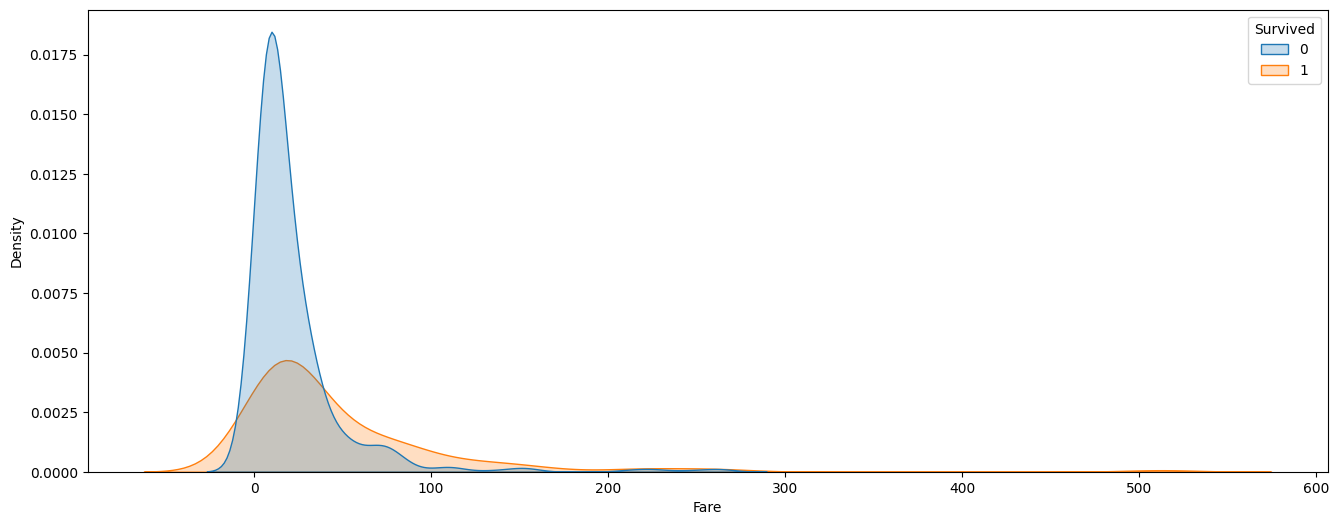

In [27]:
plt.figure(figsize=(16, 6))
sns.kdeplot(data=data, x='Fare', hue='Survived', fill=True)

<Axes: xlabel='Survived', ylabel='Count'>

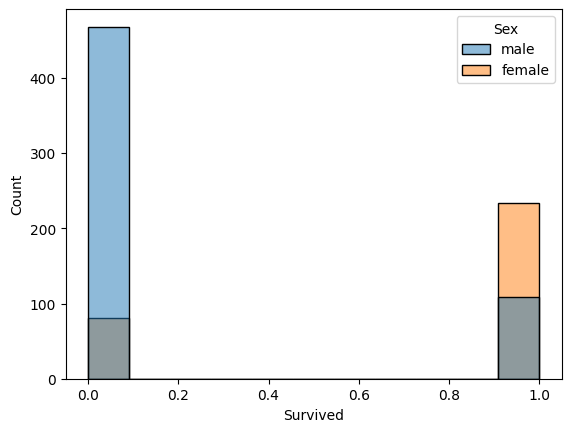

In [28]:
sns.histplot(x='Survived', data=data, hue='Sex')